# **イントロダクション**


## **jupyter notebook とは?**

H.H : 「jupyter notebook について教えてください」

ChatGPT : 「

Jupyter Notebookは、コード、テキスト、グラフ、画像などを含む対話的なドキュメントを作成するためのオープンソースのWebアプリケーションです。   
Jupyterは、Python、R、Juliaなどのプログラミング言語をサポートしています。  
Jupyter Notebookの特徴は、<span style="color: red; ">コードとその実行結果をインタラクティブに組み合わせてドキュメントを作成できる</span>ことです。また、MarkdownやLaTeXといった記法による文章の執筆が可能です。  
これにより、データの分析や可視化、実験や教育、レポートや論文の執筆などに利用されます。  
Jupyter Notebookは、ブラウザを介して使用され、<span style="color: red; ">多くのプログラマーやデータサイエンティストによって広く利用されています。</span>  
インストールや設定が簡単で、無料で利用できます。また、Jupyter Notebookを使用して作成されたファイルは、GitHubなどのバージョン管理ツールで簡単に共有できます。  

」



# **基本的な操作方法**
(左のメニューに目次があるので、見てみると分かりやすいです)

### **コマンドモードとエディットモード**

Jupyter Notebook にはセル全体を操作する「コマンドモード」と「エディットモード」が存在する。


コマンドモード : セルの移動や削除、挿入などが行える  
エディットモード : セル内のコードやテキストを編集することができる。



**切り替え方法**  
コマンドモード → エディットモード : **Enter**  
エディットモード → コマンドモード : **Esc**


### **セルを実行する**
jupyter Notebookは、セルと呼ばれるコードやテキストを入力する領域を持っています。セルにコードやテキストを入力し、<span style="color: red; ">**Shift + Enterキー** </span> または <span style="color: red; ">**Ctrl + Enterキー** </span>  を押すことで、セルを実行できます。  
コマンドモード、エディットモードどちらでも良い

In [1]:
# Shift + Enter を押す
1+1

2

In [2]:
# Ctrl + Enter を押す
2+2

4

### **セルの種類を切り替える**
セルには、コードを入力する「Code」セルとテキストを入力する「Markdown」セルがあります。  
セルの種類を変更するには、エディットモード中に <span style="color: red; ">**y で Code セル** </span>, <span style="color: red; ">**m で Markdown セル** </span> に変更できる。

以下のセルを適切なセルに変更しましょう。

Q1, 
これはコードではなく説明だよ

In [3]:
#Q2

#これは Hello world と表示するコードです。

print("Hello world")

Hello world


### **カーネルを再起動する**

カーネルを再起動するには、「Kernel」メニューから「Restart」を選択します。

In [4]:
#最初はエラーが出る
a

NameError: name 'a' is not defined

In [ ]:
# 変数 a を定義する
a = 1

In [5]:
# 上で定義されているのでエラーにならない
a

NameError: name 'a' is not defined

- もう一度最初にエラーが出たセルを実行するとエラーが出なくなっている
- カーネルをリスタートする(上のボタンでRestartを押す)と変数等すべてが初期状態に戻る
- もう一度最初にエラーが出たセルを実行すると再度エラーとなる

### **Shut Down**

開いている notebook ごとにカーネルが動いている。ファイルを開きすぎると重くなることもあるので、動作が重いと感じたら使用していないnotebookのカーネルを shut down する。  
- 「左のマルの中に四角のタブを選ぶ」→「KERNELS の欄から shut down したい notebook にカーソルを合わせて×を押す」
- OPEN TABS は表示が消えるだけで KERNEL は shut down されない

# **ハンズオンの使い方**

 
色々おまじないが書いてあるが気にせず実行する

In [6]:
###################
##  おまじない
###################

import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats
from scipy.stats import binom, poisson, geom
from ipywidgets import interact


# フォントおよびフォントサイズ
rcParams['font.family'] = 'Meiryo'
rcParams['font.size'] = 16.0


# カラーサイクルの設定
plt.rcParams['axes.prop_cycle'] = (
    plt.cycler('color', 
            # 上から優先順位が高い順になっています
               [
                '#1167A7', # 青色：メインカラー1
                '#F6A90E', # 黄色：メインカラー2
                '#ABB7B9', # 灰色：サブカラー1
                '#4DA9ED', # 薄い青色
                '#FBDD9F', # 薄い黄色
                '#CDD4D5', # 薄い灰色
                '#0D4D7D', # 濃い青色
                '#BC8007', # 濃い黄色
                '#7A8D91', # 濃い灰色
               ])
)
# 上記12色で対応できない場合は以下のマーカーで差別化してください 
# 優先度：'o'（〇）＞','（■）＞'v'（▲）＞'^'（▼）＞

# #C4240E, # 赤色：アクセントカラー1
# #1C1C1C', # 黒色：アクセントカラー2



%matplotlib inline

- 【確認事項】を読む
- 変更する変数にある変数の値を変えて何回か実行してみる(Ctrl+Enter) or スライドバー

## (例1)正規分布

$
\begin{equation}
  P(x)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp{(-\frac{(x-\mu)^2}{2\sigma^2})}
\end{equation}
$

$\mu$ : 平均値  
$\sigma$ : 標準偏差


【確認事項】
- パラメーターによってどのように分布の形状が変わるかを確認する

In [7]:
def gauss_func(mu, sigma):
    """ガウス分布を作成し、描画する関数

    Args:
        mu (float): 平均値
        sigma (float): 標準偏差
    """
    x = np.arange(-100,100,1)
    a = 1/(math.sqrt(2*math.pi*sigma*sigma)) # 規格化因子
    f = a * np.exp(-(x - mu)**2 / (2*sigma**2)) # ガウス分布の式

    fig, ax = plt.subplots()
    ax.set_ylim(0,0.1)
    ax.set_xlim(min(x),max(x))
    ax.plot(x,f)

In [8]:
interact(gauss_func, mu=(-50,50,1), sigma=(5,50,0.1) );

interactive(children=(IntSlider(value=0, description='mu', max=50, min=-50), FloatSlider(value=27.0, descripti…

### **うまく表示されない場合**

正しく表示されない場合は以下の変数を自分の手で変える

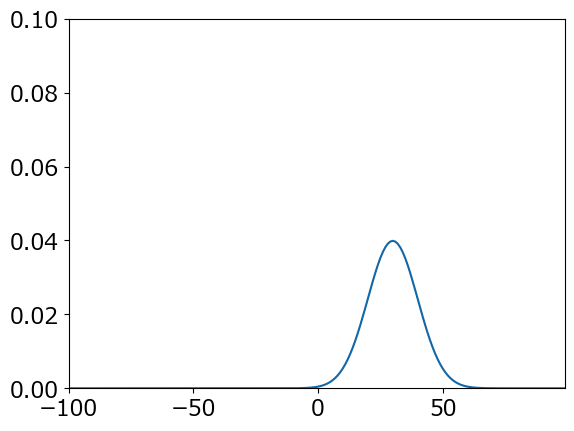

In [9]:
##-- 変更する変数 --##
mu = 30 #平均値
sigma = 10
##------------------##

gauss_func(mu, sigma)